# Bilimsel Programlamaya Kolay Başlangıç - II

Bilimsel Programlamaya Kolay Başlangıç serisinin ilk yazısında sadece grafikler için `matplotlib` kütüphanesini kullanarak serbest düşüş problemini modellemiş ve sonuçları grafiklerle görselleştirmiştik. Vesileyle, "fonksiyonları ne zaman nerede kullanmak gerekir" sorusuna da bir başlangıç yapmıştık. 

İlk yazıda Bilimsel Programlama 3 adımdan oluşur dedik, ama aslında birçok problemde dört adımdan bahsetmek mümkün: 
1. Hazırlık (Sabitleri başlatma, gerekirse veri yapılarını oluşturma vb.)
2. Hesaplama
3. Veri Analizi (Hesaplama sonuçlarını gerçek veriler ya da başka bir modelle karşılaştırma, diğer bir deyişle Hata ya da Fark Analizi)
4. Sonuçları Görselleştirme

Bu yazıda öncelikle eğik atış problemini çözeceğiz ve sayısal yöntemlerin ne kadar başarılı olduğuna bakacağız. Elimiz değmişken sınıf (class) yapılarının nasıl kullanıldığına dair de basit bir örnek yapmış olacağız.

Eğik atış problemi iki eksende çözülüyor, yatay eksen x ve düşey eksen y. 

İki eksendeki konum değişimi şu şekilde gösterilebilir:  
$t$ anında yatay eksendeki konum: $ r_x(t) = r_x(0) + v_x(0) t $  
$t$ anında düşey eksendeki konum: $ r_y(t) = r_y(0) + v_y(0) t - \frac{1}{2} g t^2 $  

İki eksendeki hız değişimi ise şu şekilde gösterilebilir:    
$t$ anında yatay eksendeki hız: $ v_x(t) = v_x(0) $  
$t$ anında düşey eksendeki hız: $ v_y(t) = v_y(0) - g t $  

Parametreler ise şöyle:  
$r_x(t), r_y(t) = $ x ve y ekseninde konum vektörü bileşenleri ($m$)   
$v_x(t), v_x(t) = $ x ve y ekseninde hız vektörü bileşenleri ($m/s$)   
$g = $  yerçekimi sabiti (9.81 $m/s^2$)  
$t = $  zaman  ($s$)

Formüllerin bize anlatmak istediği şey şu:
1. Cisim yatay eksende başlanıç hızında gitmeye devam eder
2. Cisim düşey eksende başlangıç hızında başlar, hızı yerçekimi ivmesiyle orantılı olarak düşey yönde değişir ve sonuçta düşmeye başlar.  

"Bu kadar matematik yeter" diyorsanız, kodlama işine başlayalım o zaman. Öncelikle basit bir vektör sınıfı oluşturalım. Bu sınıf zaman, yatay ve düşey konum ile yatay ve düşey hız bileşenlerinden oluşuyor.

In [1]:
class zamanKonumHız:
   'Zaman, 2D konum ve 2D hız değerlerini içeren vektör sınıfı'
   t = 0
   rx, ry = 0, 0
   vx, vy = 0, 0

   def __init__(self, t0, rx0, ry0, vx0, vy0):
      self.t  = t0
      self.rx = rx0
      self.ry = ry0
      self.vx = vx0
      self.vy = vy0

Bundan sonra belirli bir zamana ait konum ve hız bilgilerimizi bir arada tutmak için bu yapıyı kullanacağız. 

Bu sınıfın sadece bir metodu var, o da `__init__()`. Adından da anlaşılacağı üzere bu sınıfın parametrelerini doldurmak için kullanılıyor. Herhangi bir parametre için varsayılan değer yok, çünkü konum ve hızı içeren bir vektörün başlangıç değerinin ne olduğunu tahmin etmemiz mümkün değil. 

Hazırlık kısmına devam edelim. Öncelikle kullanacağımız paketleri ekliyoruz ve yerçekimi sabitini dolduruyoruz. Başlangıç zamanı, bitiş zamanı ve adım büyüklüğünü de burada dolduruyoruz. Tüm bu parametreleri en başta tanımlıyourz ki, sonradan başka değerler kullanmak istersek hepsini derli toplu burada bulabilelim.  

Yaptığımız birkaç eğlenceli iş daha var; başlangıç hızının büyüklüğünü ve ilk atış açısını veriyoruz, sonra da `pvt0` başlangıç vektörünü bu değerlerle dolduruyoruz. Bu aşamada birimlere dikkat, Python `math.sin` ve `math.cos` fonksiyonları derece değil radyan cinsinden parametrelerle çalışıyor. Emin olun dalgınlıkla bunu gözden kaçırmak çok kolay.

En son yaptığımız iş ise `zamanKonumHız` adlı, zaman, konum ve hız bilgisini paketleyen yapılardan oluşan boş bir liste oluşturmak. Her zaman adımında yaptığımız hesaplamalarla oluşturduğumuz bu veri paketlerini buraya istifleyeceğiz. 

In [2]:
# sonradan gerekecek kütüphanelerini çağır
import matplotlib.pyplot as plt
import math

# Kütleçekimi Sabiti [m/s^2]
gDünya = 9.81

# başlangıç zamanı
t0 = 0
# bitiş zamanı (sn)
tSon = 100
# adım büyüklüğü (sn)
tAdım = 0.5

# başlangıç hızı (m/sn) ve atış açısı (derece)
v0 = 100 
yükselmeAçısı = 50 

# başlangıç konum ve hız
pvt0 = zamanKonumHız(t0, 0, 0, v0*math.cos(math.radians(yükselmeAçısı)), v0*math.sin(math.radians(yükselmeAçısı)))

# Zaman, yükseklik ve hız bilgilerini içeren vektör listelerini oluştur
pvtList = []

Uzun hazırlık evreleri bilimsel programlamacılığın doğasında vardır. Varsayılan değerler, bilimsel sabitler, seçenekler, konfigürasyonlar gibi birçok parametre ve bilgi genellikle ilk adım olarak oluşturulur. Ayrıca gerekli bilgileri tutacak veri yapıları, sınıflar ve o sınıfların alt metodları ya da işlevleri de yine en başta oluşturulur. Bilimsel Programlama işlerinde pek de dile getirilmeyen bir sırrı artık biliyorsunuz: Zamanın önemli bir kısmı bu tür göze gözükmeyen ama mecburi işlerle geçer. Bununla birlikte, bu adımı ne kadar özenli yaparsanız Hesaplama ve sonrasındaki Veri Analizi aşamalarında başınız o kadar az ağrır. 

Sonunda Hesaplama adımına ulaşmayı başardık. Bu adım, verilen bir $t$ zamanı için, başlangıç değerlerinden(`pvt0`) nereye varılacağını hesaplayan bir fonksiyondan ibaret. Fonksiyonun içindeki matematiği yazının başında açıklamıştık zaten - zamana bağlı olarak yatayda ve düşeyde konum ve hız hesaplanıyor. Yeni konum, zaman ve hızdan oluşan bu veri paketi fonksiyon tarafından döndürülüyor, ancak başlangıç değerleri değiştirilmiyor.  

In [3]:
def tAnındaZamanKonumHız(t, pvt0, g=gDünya):
    """Verilen bir t zamanı için yeni konum ve hızı döndürür"""
    tYeni  = pvt0.t + t
    rxYeni = pvt0.rx + pvt0.vx * t
    ryYeni = pvt0.ry + pvt0.vy * t + (-1/2 * g * t**2)
    vxYeni = pvt0.vx 
    vyYeni = pvt0.vy + (-g) * t
    return zamanKonumHız(tYeni, rxYeni, ryYeni, vxYeni, vyYeni)

Hesaplama adımında yapmamız gereken tek şey bu fonksiyonu her bir zaman adımı için tekrar tekrar çağırmak. Diğer bir deyişle döngü $t \le t_{Son}$ olana dek çalışıyor. Ancak ikinci bir kontrol daha var, cismimiz yerin altına düşmesin diye hesaplanan irtifa değeri sıfırın altına inerse de döngüden çıkılıyor.

In [4]:
t = pvt0.t
h = pvt0.ry 
while t<=tSon and h>=0:
    pvtList.append( tAnındaZamanKonumHız(t, pvt0) )
    h = pvtList[-1].ry
    t += tAdım

Şimdilik bir Veri Analizi adımımız yok, bir sonraki örnekte karşımıza çıkacak. Bu nedenle Görselleştirme adımına geçebiliriz. Bu kez zamana karşı değil yatay ve düşey eksenlerdeki konum ve hızı göstereceğiz.

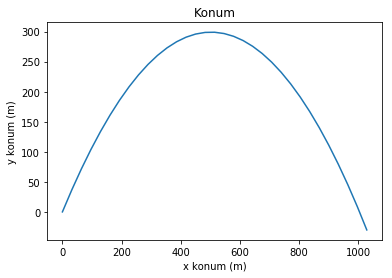

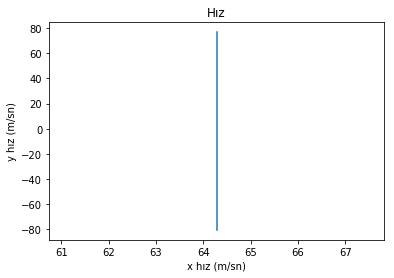

In [5]:
# konum grafiği 
plt.plot( [pvt.rx for pvt in pvtList], [pvt.ry for pvt in pvtList])

plt.title("Konum")
plt.xlabel("x konum (m)")
plt.ylabel('y konum (m)')

plt.show()

# hız grafiği
plt.plot( [pvt.vx for pvt in pvtList], [pvt.vy for pvt in pvtList])

plt.title("Hız")
plt.xlabel("x hız (m/sn)")
plt.ylabel('y hız (m/sn)')

plt.show()

Konum grafiği beklediğimiz gibi çıktı, ama hız grafiği biraz tuhaf. Aslında hız grafiğinin bize anlatmaya çalıştığı, yatay hızın hiç değişmediği, düşey hızınsa yaklaşık 80 m/s'den başlayıp -80 m/s civarında sonlandığı.

İlginç bir nokta daha var: son konum 0'ın altında çıktı. Bunun da sebebi şu; `while` döngüsü, irtifanın 0'ın altında olduğu bir değer hesaplanıp listeye eklendikten _sonra_ irtifa kontrolünü yapıyor ve döngüden çıkıyor, haliyle 0'ın altında kalan son değer de grafiğe giriyor. İrtifanın tam olarak sıfıra denk geldiği yerde grafiği sonlandırmak isteseydik işler epey karışacaktı, zira bu sefer hangi zamanda irtifanın sıfıra eşit olduğunu bulmak için aradaki değeri tahmin etmemiz (İngilizcesiyle _interpolation_) ya da benzer başka bir yöntem kullanmamız gerekecekti. Şimdilik yazılımı karmaşıklaştıracak bu işlere girmiyoruz, zira bizi başka konular bekliyor.

Yazının başında Veri Analizi adımından bahsetmiştim, artık buna dair bir örnek yapmanın da zamanı geldi. Sayısal integrasyon ya da sayısal diferansiyel çözümü metodları diye afili isimler verilen, ama aslında "ben tembel adamım, ben çalışacağıma bilgisayar çalışsın" diyenlerin şaşmaz tercihi olan metodların en basitiyle eğik atış problemini çözeceğiz. Sonra da bunu şimdiye dek hesapladığımız "gerçek" değerlerle karşılaştırarak yaptığımız hatayı ölçeceğiz.

Öncelikle her zaman olduğu gibi işin Hazırlık adımına bakalım. Bu adımda yapılan işler artık tanıdık, ama ufak bir ek yaptık ve `konumBüyüklüğü()` ile `hızBüyüklüğü()` metodlarını ekledik. Sınıf yapılarının iki temel özelliği var: _bilgi depolamak_ ve bu sınıfa ait bir _işlevi_ yerine getirmek. Bizim vektör sınıfı da zaman, konum ve hız gibi bilgileri depoluyor ve artık konum ve hız vektörlerinin büyüklüğünü hesaplama işlevini yerine getiriyor. Bu işlevlere daha sonra ihtiyacımız olacak.

In [6]:
class zamanKonumHız:
   'Zaman, 2D konum ve 2D hız değerlerini içeren vektör sınıfı'
   t = 0
   rx, ry = 0, 0
   vx, vy = 0, 0

   def __init__(self, t0, rx0, ry0, vx0, vy0):
      self.t  = t0
      self.rx = rx0
      self.ry = ry0
      self.vx = vx0
      self.vy = vy0

      
   def konumBüyüklüğü(self):
       """Konum vektörünün büyüklüğünü döndürür"""
       return math.sqrt(self.rx*self.rx+self.ry*self.ry)

   def hızBüyüklüğü(self):
       """Hız vektörünün büyüklüğünü döndürür"""
       return math.sqrt(self.vx*self.vx+self.vy*self.vy)

Hazırlık işlerinin kalanı da tanıdık. Ama bu kez hata vektörünü de hazırlayıp başlangıç değerlerini 0 olarak giriyoruz. Gerçek değer ile sayısal metodlarla hesaplanan değer arasındaki farkı her adımda bu yapıya kaydedeceğiz.

Bunun yanı sıra sayısal hesaplama ve gerçek vektörleri taşıyacak yapıların da ilk değerlerini dolduruyoruz. Bunu yapma amacımız, hesaplamanın ilk değerlerini bildiğimiz için hesaplama döngüsüne girmelerini engellemek. Daha sonra döngüyü kurarken bu ilk zaman adımını atlayacağız.

In [7]:
# sonradan gerekecek kütüphanelerini çağır
import matplotlib.pyplot as plt
import math

# Yerçekimi sabiti [m/s^2]
gEarth = 9.81

# başlangıç zamanı
t0 = 0
# bitiş zamanı (sn)
tSon = 100 
# adım büyüklüğü (sn)
tAdım = 0.5

# başlangıç hızı (m/sn) ve atış açısı (derece)
v0 = 100 
yükselmeAçısı = 50 

# başlangıç konum ve hız
pvt0 = zamanKonumHız(t0, 0, 0, v0*math.cos(math.radians(yükselmeAçısı)), v0*math.sin(math.radians(yükselmeAçısı)))

# ilk değerleri doldur
gerçekPvtList = [pvt0]
numPvtList    = [pvt0]
hataPvtList   = [zamanKonumHız(t0, 0, 0, 0, 0)]

Gelelim Hesaplama adımına. Kullanacağımız sayısal integrasyon yöntemi [Euler Metodu](https://en.0wikipedia.org/wiki/Euler_method). Yöntemin detaylarına girmeyeceğim ama eğik atış problemi için yapılan iş özetle şöyle:
1. Başlangıç zamanındaki hız ve ivmenin çok kısa bir süre için sabit olduğunu varsayarak, bir sonraki adım için yeni hızı ve yeni konumu hesapla
2. İlk adımda hesaplanan hız ve ivmenin çok kısa bir süre için sabit olduğunu varsayarak, bir sonraki adım için yeni hızı ve yeni konumu hesapla
3. İkinci adımda hesaplanan hız ve ivmenin çok kısa bir süre için sabit olduğunu varsayarak, bir sonraki adım için yeni hızı ve yeni konumu hesapla
4. ...

Elbette ivme bizim problemde sabit, ama sabit olmasaydı (örneğin Dünya'dan çok uzaklaşıyor olsaydık) ivmeyi tekrar tekrar hesaplamamız gerekecekti.

Eğik atış probleminde Euler Metodu'nun bir adımının matematiksel ifadesi ise şöyle:

$t_n$ anında yatay eksendeki konum: $ r_x(t_n) = r_x(t_{n-1}) + v_x(t_{n-1}) dt$    
$t_n$ anında düşey eksendeki konum: $ r_y(t_n) = r_y(t_{n-1}) + v_y(t_{n-1}) dt$    

$t_n$ anında yatay eksendeki hız: $ v_x(t_n) = v_x(t_{n-1}) $  
$t_n$ anında düşey eksendeki hız: $ v_y(t_n) = v_y(t_{n-1}) + g dt $  

Yani $t_n$ anındaki konum ve hız, $t_{n-1}$ anındaki konum ve hız ile $dt$ ile ifade edilen adım büyüklüğüne bağlı. Yatay eksende hız değişmiyor, çünkü bunu sağlayacak bir kuvvet ya da ivme yok. Düşey hız ise sabit ivmeye bağlı.

`tAnındaZamanKonumHız()` metodu bu yazıda verilen bir önceki örnekle aynı ve bize her hesaplama zamanı için "gerçek" konum ve hız değerlerini veriyor. `eulerZamanKonumHız()` ise, yukarıda bahsettiğimiz matematiksel modelle _yaklaşık_ değerleri her adım için hesaplıyor.

In [8]:
def tAnındaZamanKonumHız(t, pvt0, g=gDünya):
    """Verilen bir t zamanı için yeni konum ve hızı döndürür"""
    tYeni  = pvt0.t + t
    rxYeni = pvt0.rx + pvt0.vx * t
    ryYeni = pvt0.ry + pvt0.vy * t + (-1/2 * g * t**2)
    vxYeni = pvt0.vx 
    vyYeni = pvt0.vy + (-g) * t
    return zamanKonumHız(tYeni, rxYeni, ryYeni, vxYeni, vyYeni)

def eulerZamanKonumHız(dt, pvt, g=gDünya):
    """Verilen bir dt adım büyüklüğü için yeni konum ve hızı döndürür"""
    tYeni  = pvt.t  + dt
    rxYeni = pvt.rx + pvt.vx * dt
    ryYeni = pvt.ry + pvt.vy * dt 
    vxYeni = pvt.vx + 0 * dt
    vyYeni = pvt.vy + (-g) * dt
    return zamanKonumHız(tYeni, rxYeni, ryYeni, vxYeni, vyYeni)

Hesaplama mekanizmamızı da kurduk, artık hesaplama döngüsüne geçelim. İlk iş, irtifayı gerçek listenin ilk adımına ayarlamak oldu. İlk zaman adımını başta doldurduğumuz için döngüde hesaplanacak hedef zaman adımını da adım büyüklüğü kadar ilerlettik. Sonra da döngüye girdik. Döngüde önce gerçek zaman, konum hız vektörünü, sonra sayısal hesaplamayı, en sonda da bu ikisinin farkına karşılık gelen hata vektörünü doldurduk. Hazırlık adımını detaylı bir şekilde yaptığımız için döngü bu kadar basit oldu.

In [9]:
# Döngüyü çalıştır
t = gerçekPvtList[0].t + tAdım
h = gerçekPvtList[0].ry 
while t<=tSon and h>=0:
    pvtGerçek = tAnındaZamanKonumHız(t, pvt0)
    gerçekPvtList.append( pvtGerçek )
    
    pvtNum = eulerZamanKonumHız(tAdım, numPvtList[-1])
    numPvtList.append( pvtNum )
    
    hataPvt = zamanKonumHız(t, pvtNum.rx-pvtGerçek.rx, pvtNum.ry-pvtGerçek.ry, pvtNum.vx-pvtGerçek.vx, pvtNum.vy-pvtGerçek.vy)
    hataPvtList.append(hataPvt)
    
    h = gerçekPvtList[-1].ry
    t += tAdım

O halde sonuçları görelim. Bu kez aynı grafiğe hem gerçek hem de sayısal yöntemlerle hesaplanan yaklaşık konum ve hızı basacağız. Sonra da hata grafiklerini çizdireceğiz. Grafik başlıklarına ve veri etiketlerine adım büyüklüğünü yazdırıyoruz ki sonradan bu grafiklere baktığımızda hatırlayabilelim. 

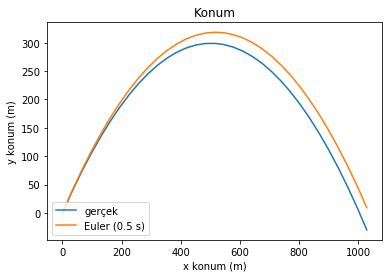

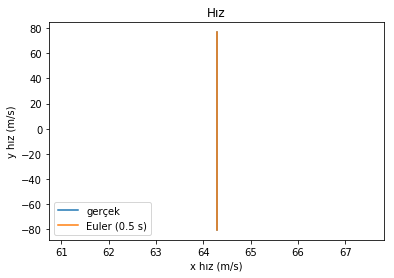

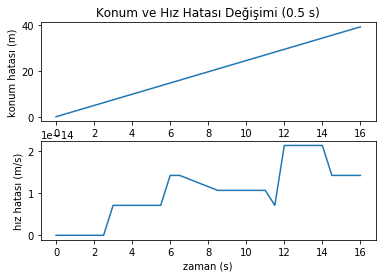

In [10]:
# konum grafiği 
plt.plot( [pvt.rx for pvt in gerçekPvtList], [pvt.ry for pvt in gerçekPvtList], label="gerçek")
plt.plot( [pvt.rx for pvt in numPvtList], [pvt.ry for pvt in numPvtList], label="Euler (" + str(tAdım) + " s)")

plt.title(r"Konum")
plt.xlabel("x konum (m)")
plt.ylabel('y konum (m)')
plt.legend(loc=3)

plt.show()

# hiz grafiği
plt.plot( [pvt.vx for pvt in gerçekPvtList], [pvt.vy for pvt in gerçekPvtList], label="gerçek")
plt.plot( [pvt.vx for pvt in numPvtList], [pvt.vy for pvt in numPvtList], label="Euler (" + str(tAdım) + " s)")

plt.title(r"Hız")
plt.xlabel("x hız (m/s)")
plt.ylabel('y hız (m/s)')
plt.legend(loc=3)

plt.show()

# hata grafikleri 
plt.subplot(211)
plt.plot( [pvt.t for pvt in hataPvtList], [pvt.konumBüyüklüğü() for pvt in hataPvtList])

plt.title(r"Konum ve Hız Hatası Değişimi (" + str(tAdım) + " s)")
plt.xlabel("zaman (s)")
plt.ylabel('konum hatası (m)')

plt.subplot(212)
plt.plot( [pvt.t for pvt in hataPvtList], [pvt.hızBüyüklüğü() for pvt in hataPvtList])

# plt.title(r"Hız Değişimi ($ v = gt $)")
plt.xlabel("zaman (s)")
plt.ylabel('hız hatası (m/s)')

plt.show()

Hiç fena değil, değil mi? Konum değerlerinde gerçek değerden ne kadar saptığımızı görüyoruz. Hız grafiğinde ise pek bir fark göremiyoruz. Hata analizi için özel olarak ürettiğimiz grafiklere bakarak daha fazla bilgi edinebiliriz elbette. Buna göre konum hatası lineer olarak artıyor ve 16 saniyede 40 metreye ulaşıyor. E zaten 1000 m yol gitmiştik, pek iyi bir performans gösterdiğimiz söylenemez; hatamız %4 nispetinde. Oysa hız konusunda gayet iyiyiz, altı üstü 0.00000000000002 m/s hata yapmışız - grafikte y eksenindeki değerlerin üstündeki "_1e-14_" ifadesine dikkat. 

Konum ve hızdaki bu kadar farklı hata davranışının sebebi gerçek dinamiğin matematiğinde ve Euler Metodu'nda gizli. Konum değişimi zamanın karesiyle orantılı, hız değişimi ise zamanla doğru orantılı. Euler Metodu lineer sistemleri hatasız olarak modelleyebilirken, lineer olmayan sistemleri hatalı bir şekilde modelleyebiliyor. "Madem lineer sistemler hatasız, hızda niye küçük de olsa bir hata var?" diye soranlar olabilir. Soruyu Orhan Gencebay'dan ilhamla, "hatasız makine olmaz" diye yanıtlayabiliriz; bilgisayarlar çalışma prensipleri gereği gerçel bir sayıyı sınırsız uzunlukta depolayamazlar. Yani bir sayıyı defalarca 1.2345678 ile çarpıp bölerseniz neticede başladığınız yere dönmeyi beklersiniz, ama bilgisayarda bunu yaparsanız küçük de olsa bir hata görürsünüz. İnanmayanlar deneyebilir! Bu örnekte gördüğümüz 10<sup>-14</sup> seviyesindeki bu hata "kayan nokta" (_İng. floating point_) hataları için normal kabul edilebilecek bir seviye.

Sayısal metodların doğruluğu genellikle seçilen adım büyüklüğüne bağlıdır. Konum hatasından memnun olmayanlar  hesaplamayı 0.1 saniye adım büyüklüğü için tekrar edebilirler. Spoiler vermiş gibi olacağım ama hata 40 metreden 7.5 metreye düşüyor, lakin bilgisayar 5 kat daha fazla sayıda döngü hesaplamak zorunda kalıyor. Çoğumuzun bilgisayarında bu kadar basit bir problem için sorun olmayacaktır, ama eğik atıştan daha karmaşık problemler için bunun bir sorun teşkil edeceğini size garanti edebilirim. 

Adım büyüklüğü küçüldükçe modeldeki hata azalır, ama daha fazla sayıda işlem yapıldığı için yukarıda kayan nokta meselesinde birazcık bahsettiğimiz, bilgisayarın hesaplama hataları diyeceğimiz hatalar artar. Nitekim 0.1 saniye adım büyüklüğünde hız hatası 10<sup>-13</sup> seviyesine yükseliyor.

Bu örneğimizde de saf Python kullandık, _hala_ `numpy` gibi daha eğlenceli ve yetenekli yapılara giremedik; bir sonraki aşama için sözüm olsun. En azından, hem eğik atış problemini karmaşıklaştırıp sayısal metodlara giriş yaptık, hem de sınıf yapılarına değindik.

Bu yazıyı çalıştırılabilir bir Jupyter defteri halinde, yazıdaki iki örneğin kodlarıyla birlikte GitHub sayfamızda bulabilirsiniz.